## 회귀알고리즘과 모델 규제
농어 무게를 예측하라!
### k-최근접 이웃 회귀

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error

In [3]:
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

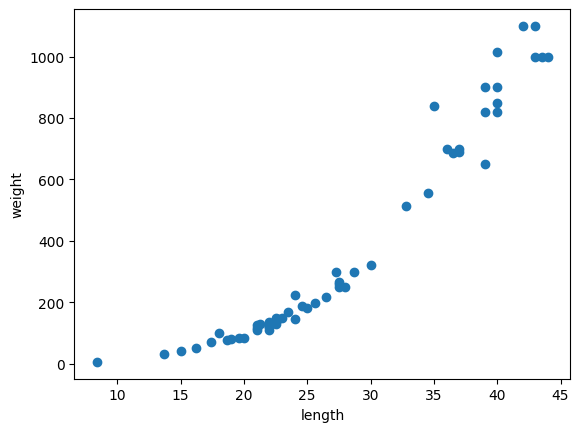

In [4]:
plt.scatter(perch_length, perch_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

training set, test set 분리

In [6]:
train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state=42)

In [9]:
print(train_input.shape, test_input.shape)

(42,) (14,)


- scikit-learn에서 training set은 2차원 배열이어야 함
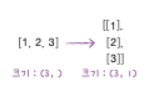
- reshape()으로 배열의 크기를 바꿀 수 있음

In [7]:
test_array = np.array([1, 2, 3, 4])
print(test_array.shape)

(4,)


In [8]:
test_array = test_array.reshape(2, 2)
print(test_array.shape)

(2, 2)


In [10]:
train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)
print(train_input.shape, test_input.shape)

(42, 1) (14, 1)


### 결정계수
- 분류의 경우 테스트 세트에 있는 샘플을 정확하게 분류한 개수의 비율이다. 정확도라고 부른다. 정답을 맞춘 비율
- 회귀의 경우 결정계수(R^2)으로 평가
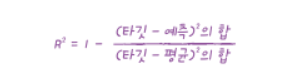
- 예측이 타겟에 가까워지면 분자가 0이되므로 1에 가까워지고
- 예측이 평균에 가까워지면 분모 분자가 비슷해져 0에 가까워진다.

In [15]:
knr = KNeighborsRegressor()

knr.fit(train_input, train_target)

knr.score(test_input, test_target)

0.992809406101064

- 타깃과 예측값 사이의 차이를 구하면 어느 정도 예측에서 벗어났는지 간음할 수 있음
- mean_absolute_error()는 타깃과 예측의 절댓값 오차를 평균하여 반환한다.

In [18]:
test_prediction = knr.predict(test_input) # 테스트 세트에 대한 예측을 만듦

mae = mean_absolute_error(test_target, test_prediction) # 테스트 셋에 대한 평균 절대값 오차
print(mae)

19.157142857142862


In [19]:
print(knr.score(train_input, train_target)) # training set에 대한 결정계숙

0.9698823289099254


### 과대 적합, 과소 적합
- 모델을 training set에 훈련하면 training set에 잘맞는 모델이 만들어진다. 하지만 결과는 테스트 셋의 결정계수가 더 높다
- 훈련 셋에서는 점수가 좋았는데 테스트 셋에서는 점수가 안좋으면 과대적합되었다고 하고
- 훈련 셋에서는 점수가 안좋은데 테스트 셋에서는 점수가 좋거나 둘다 낮으면 과소적합되었다고 한다. > 모델이 너무 단순
    - 과소적합은 훈련과 테스트에 너무 적은 데이터 셋을 사용해서 일어남
- 모델을 복잡하게 만들면 과소적합을 해결할 수 있다.
- k-최근접 회귀에서 모델을 복잡하게 만드는 방법은 이웃의 개수를 줄이는 것이다.

In [20]:
knr.n_neighbors = 3

knr.fit(train_input, train_target)
print(knr.score(train_input, train_target))
print(knr.score(test_input, test_target))

0.9804899950518966
0.9746459963987609


## 정리
- 회귀: 임의의 수치를 예측하는 문제. 따라서 타깃값도 임의의 수치가 된다.
- k-최근접 회귀: k-최근접 알고리즘을 이용하여 회귀문제를 푼다. 가장 가까운 이웃 샘플을 찾고 이 샘플들의 타깃값을 평균하여 예측으로 삼는다.
- 결정계수: 대표적인 회귀 문제의 성능 측정 도구/ 1에 가까울 수록 0에 가까울 수록 성능이 나쁜 모델
- 과대적합: 훈련 데이터셋에 너무 적합
- 과소적합: 모델이 너무 단순